In [70]:
from bs4 import BeautifulSoup as bs
import dateparser
import pandas as pd

doc = bs(open('youtube_watch_history.html', 'r').read(), 'lxml')
dates = [dateparser.parse(cell.contents[-1]) for cell in doc.select('.content-cell:has(a)')]

In [71]:
months = [date.strftime('%Y-%m') for date in dates]

data = {'date': dates, 'month': months}
grouped_dates = pd.DataFrame(data)
grouped_dates

,date,month
0,2019-10-14 18:50:45+00:00,2019-10
1,2019-10-14 18:49:47+00:00,2019-10
2,2019-10-14 18:37:51+00:00,2019-10
3,2019-10-14 18:37:46+00:00,2019-10
4,2019-10-14 18:37:44+00:00,2019-10
...,...,...
17879,2012-10-13 13:40:16+00:00,2012-10
17880,2012-10-13 13:38:13+00:00,2012-10
17881,2012-10-13 13:37:05+00:00,2012-10
17882,2012-10-13 13:31:23+00:00,2012-10


<IPython.core.display.Javascript object>


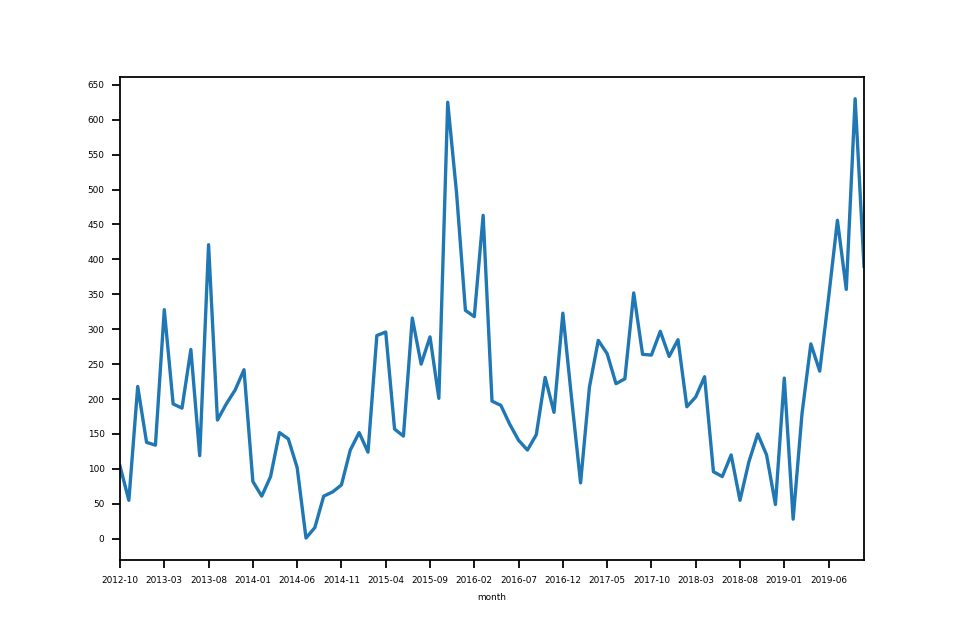

In [72]:
# makes svg format possible
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

%matplotlib notebook

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 4})
plt.rcParams.update({'figure.dpi': 160})
plt.locator_params(nbins=20)

grouped_dates.groupby(by='month')['date'].size().plot()